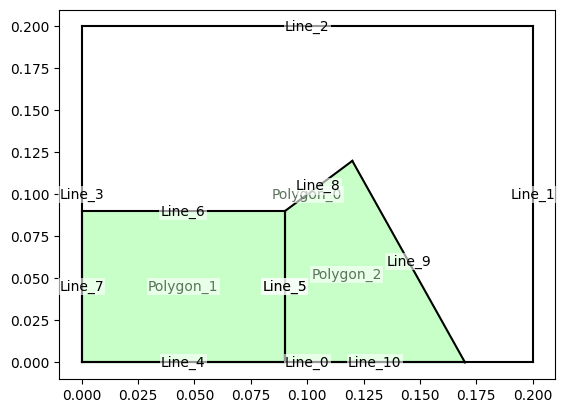

In [1]:
import fluid_fvm.physics as ph
import matplotlib.pyplot as plt
import fluid_fvm.geometry as geo
import fluid_fvm.project as pr
import fluid_fvm.mesh as ms
import numpy as np

a = geo.Assembly(base_polygon=geo.Polygon([geo.Vector(0,0),geo.Vector(0.2,0),geo.Vector(0.2,0.2), geo.Vector(0,0.2)]), 
                 polygon_list=[geo.Polygon([geo.Vector(0,0),geo.Vector(0.09,0),geo.Vector(0.09,0.09), geo.Vector(0,0.09)]),
                               geo.Polygon([geo.Vector(0.09, 0), geo.Vector(0.09,0.09),geo.Vector(0.12,0.12), geo.Vector(0.17,0)])])
a.assemble()
fig,ax = plt.subplots()
a.plot(ax, labels=True)
plt.show()

In [2]:
bcdict = {"Line_3" : 5,"Line_1" : 5,"Line_0" : 5,"Line_2" : 5,"Line_10" : 5,}
print(set(bcdict.keys()).issubset(a.getLineNames()))
c = ph.HeatTransfer(a, bcdict)
c.isBoundary("Line_3")


True


True

INNER

(1.2499999999999998, -1.2499999999999998, 0)


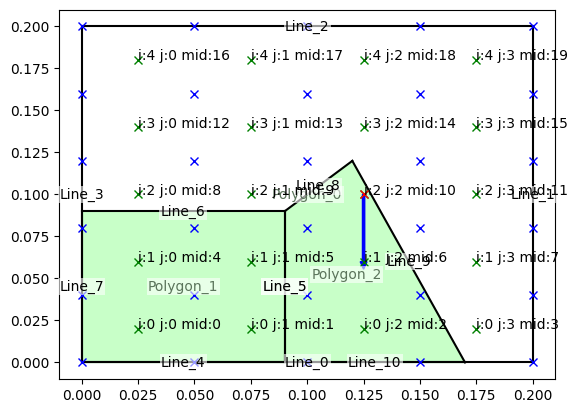

In [3]:
rec_m = ms.RectangularConfig(6,5,True)
rec_m.constructMesh(a.base_polygon)
fig,ax = plt.subplots()
a.plot(ax, labels=True)
rec_m.plotMesh(ax, vTexts=True)

node = 10
neighbour_idx = 0
neighbour_nodes = rec_m.getNeigbouringVolumeVectors(node)
neighbour_faces = rec_m.getNeighbouringFaceLines(node)

rec_m.getVNode(node).plot(ax, fmt = "rx")
neighbour_nodes[neighbour_idx].plotAsVector(ax, vect_0 = rec_m.getVNode(node))



mat_1 = pr.Material("Mat_1", gamma = 1)

coeffs = c.getFluxInner(material=mat_1, face_normal=neighbour_faces[neighbour_idx].getNormal(), neighbour_vector=neighbour_nodes[neighbour_idx])
print(coeffs)
plt.show()

Theoretical values for the east side (neighbour_idx = 1):

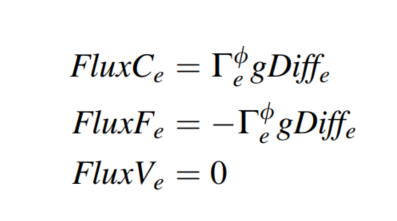

In [4]:
1*(0.2/5)/(0.175-0.125)

0.8000000000000002

Boundary

(1.25, 0, -1.25)


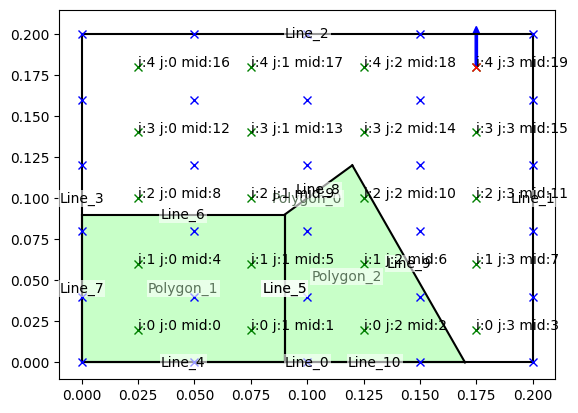

In [14]:
rec_m = ms.RectangularConfig(6,5,True)
rec_m.constructMesh(a.base_polygon)
fig,ax = plt.subplots()
a.plot(ax, labels=True)
rec_m.plotMesh(ax, vTexts=True)

node = 19
neighbour_idx = 2
neighbour_nodes = rec_m.getNeigbouringVolumeVectors(node)
neighbour_faces = rec_m.getNeighbouringFaceLines(node)

rec_m.getVNode(node).plot(ax, fmt = "rx")
neighbour_nodes[neighbour_idx].plotAsVector(ax, vect_0 = rec_m.getVNode(node))



mat_1 = pr.Material("Mat_1", gamma = 1)
b = ph.Boundary("Dirichlet", 1)
coeffs = c.getFluxBoundary(material=mat_1, face_normal=neighbour_faces[neighbour_idx].getNormal(), neighbour_vector=neighbour_nodes[neighbour_idx], boundary=b)
print(coeffs)
plt.show()

Theoratical value

In [11]:
1*0.05/(0.2/5)

1.25